# 1. 군집화

* 군집화(Clustering): 주어진 데이터 집합을 유사한 데이터들의 그룹으로 나눈 것
* 지도학습(K-nn) vs 비지도학습(K-means)
* 즉, 클러스터링은 unlabeled data에 label을 만들어주는 작업

# 2. K-Means Clustering
### 실습(1) - iris data

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# iris dataset 불러오기: sklearn.utils.Bunch
iris = load_iris()
# Data Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'seqal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,seqal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [3]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [4]:
# clustering(=labeling) 결과
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [5]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


* PCA를 통한 차원축소(4차원->2차원)

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 2차원
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,seqal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


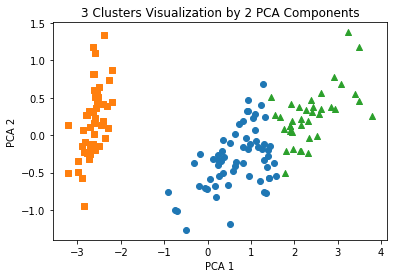

In [9]:
# clustering 값이 0, 1, 2인 경우마다 별도의 index 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# clustering 값 0, 1, 2에 해당하는 index로 각 cluster 레벨의 pca_x, pca_y 값 추출 -> o, s, ^로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

# 3. Data Generator
### 실습(2) - make_blobs() + K-means

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y(target)값의 분포 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [15]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


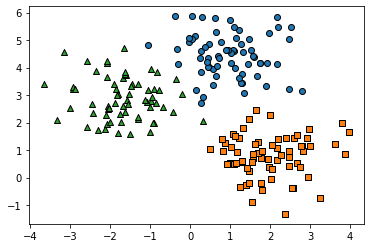

In [16]:
target_list = np.unique(y)

# 각 target별 scatter plot의 marker값들
markers = ['o', 's', '^', 'P', 'D', 'H' ,'x']

# 3개의 cluster 영역으로 구분한 데이터셋을 생성했으므로 target_list는 [0, 1, 2]
# target==0,1,2로 sscatter plot을 marker별로 생성
# target이 3개 이므로 'P','D','H','x'는 사용안됨
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
plt.show()

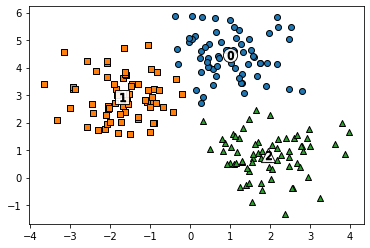

In [19]:
# KMeans 객체를 이용하여 x 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H' ,'x']

# 군집된 label 유형별로 iteration하면서 marker별로 scatter plot 수행
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
    # 군집별 중심위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()

In [22]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


# 4. 계층 군집 Clustering
### 실습(3) - dendrograms

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [53]:
# 간단한 전처리
data = data.drop('CustomerID', axis=1)
data.rename({'Genre':'Gender'}, axis=1, inplace=True) # 칼럼명 오타 수정
data['Gender'] = np.where(data['Gender']=='Male', 0 , 1) # Encoding: Male->0, Female->1

# 정규화
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.413925,0.326783,0.849635
1,0.000000,0.247025,0.176446,0.952809
2,0.037987,0.759737,0.607790,0.227921
3,0.012203,0.280676,0.195253,0.939653
4,0.018728,0.580581,0.318383,0.749137


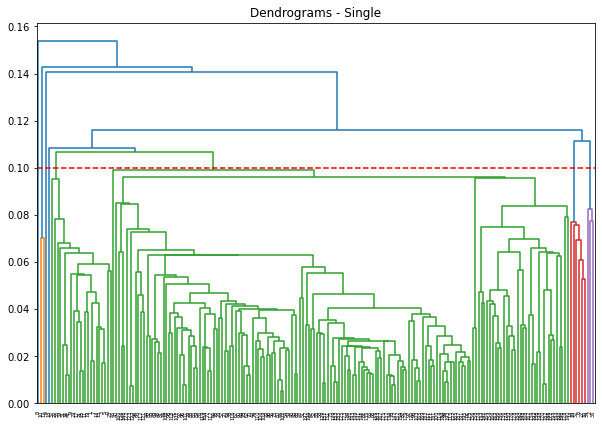

In [55]:
# Single method 사용
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title('Dendrograms - Single')
dend = shc.dendrogram(shc.linkage(data_scaled, method='single'))
plt.axhline(y=0.1, color='r', linestyle='--')

In [56]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')
cluster.fit_predict(data_scaled)

array([1, 1, 0, 1, 3, 1, 0, 1, 4, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

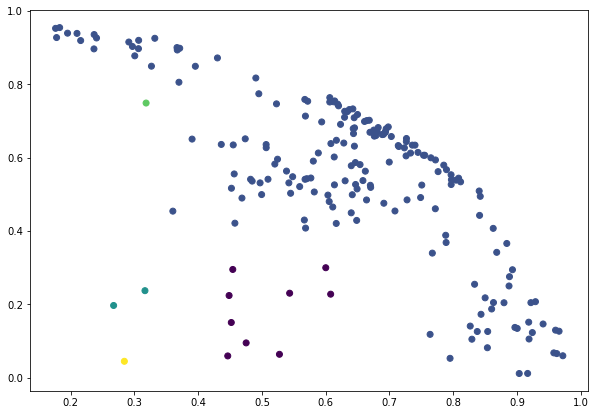

In [59]:
# Single method는 chained된 data에서는 잘 작동하지 않음
plt.figure(figsize=(10,7))
plt.scatter(data_scaled['Annual Income (k$)'], data_scaled['Spending Score (1-100)'], c=cluster.labels_)

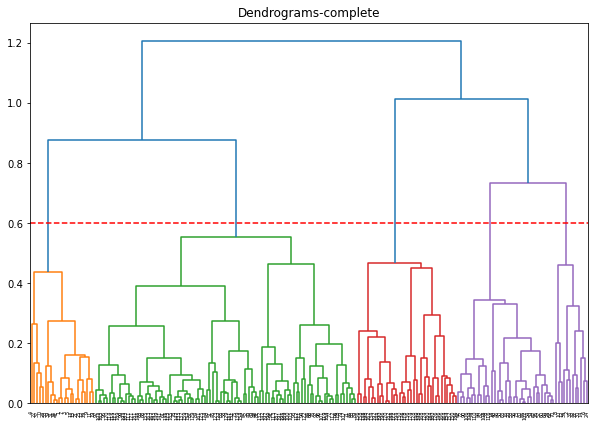

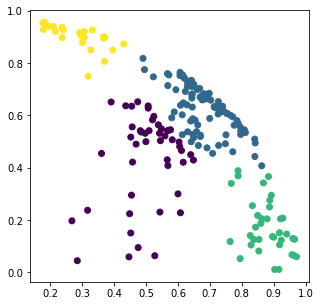

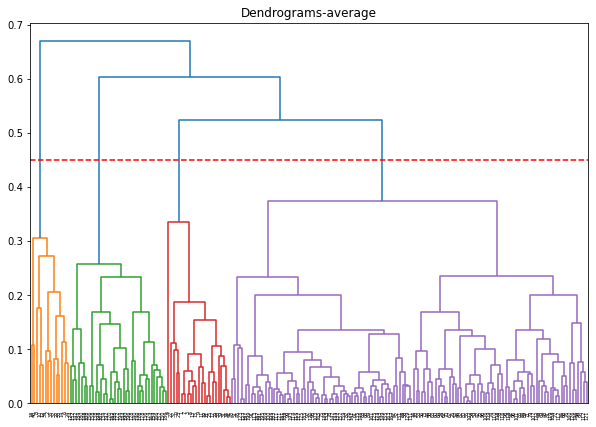

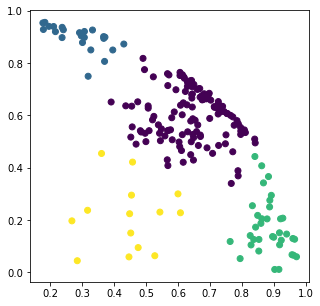

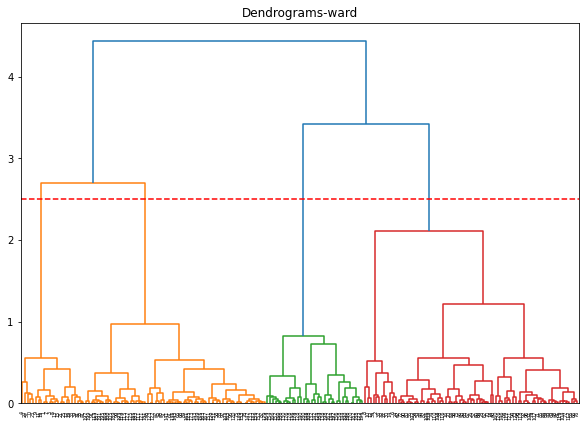

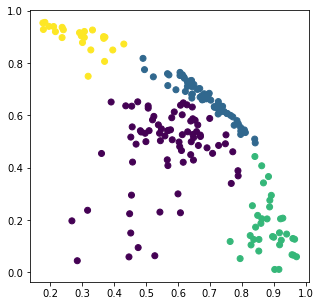

In [62]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

methods = ['complete', 'average', 'ward']
y_val = [0.6, 0.45, 2.5]

for method, y in zip(methods, y_val):
    plt.figure(figsize=(10,7))
    plt.title(f'Dendrograms-%s'%method)
    dend = shc.dendrogram(shc.linkage(data_scaled, method=method))
    plt.axhline(y=y, color='r', linestyle='--')
    
    cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage=method)
    cluster.fit_predict(data_scaled)
    
    plt.figure(figsize=(5,5))
    plt.scatter(data_scaled['Annual Income (k$)'], data_scaled['Spending Score (1-100)'], c=cluster.labels_)

# 5. PAM clustering
### 실습(4) - K-Medoids & K-Means 비교

In [63]:
# !pip install scikit-learn-extra

In [68]:
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import load_iris
import numpy as np

data = load_iris()
irisDF = pd.DataFrame(data.data, columns=data.feature_names)

kmedoids = KMedoids(n_clusters=3, method='pam', random_state=0).fit(irisDF)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(irisDF)

irisDF['target'] = data.target
irisDF['kmedoids'] = kmedoids.labels_
irisDF['kmeans'] = kmeans.labels_

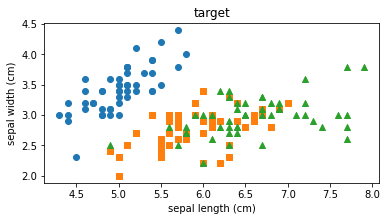

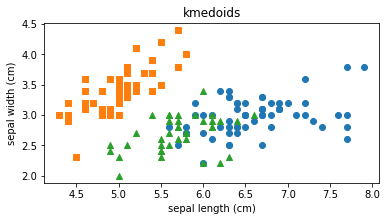

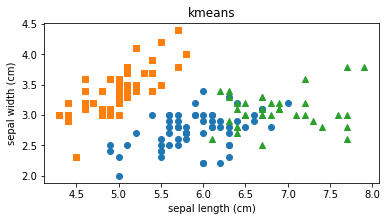

In [69]:
y = ['target', 'kmedoids', 'kmeans']
cnt = 1

for val in y:
    m0_i = irisDF[irisDF[val]==0].index
    m1_i = irisDF[irisDF[val]==1].index
    m2_i = irisDF[irisDF[val]==2].index
    
    plt.figure(figsize=(6, 10))
    plt.subplot(3, 1, cnt)
    plt.scatter(x=irisDF.loc[m0_i, 'sepal length (cm)'], y=irisDF.loc[m0_i, 'sepal width (cm)'], marker='o')
    plt.scatter(x=irisDF.loc[m1_i, 'sepal length (cm)'], y=irisDF.loc[m1_i, 'sepal width (cm)'], marker='s')
    plt.scatter(x=irisDF.loc[m2_i, 'sepal length (cm)'], y=irisDF.loc[m2_i, 'sepal width (cm)'], marker='^')
    
    plt.xlabel("sepal length (cm)")
    plt.ylabel("sepal width (cm)")
    plt.title(val)
    plt.show()
    
    cnt += 1

# 6. DBSCAN Clustering
### 실습(5) - DBSCAN + iris data

In [23]:
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [26]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result) # -1: 이상치

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


In [27]:
# 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

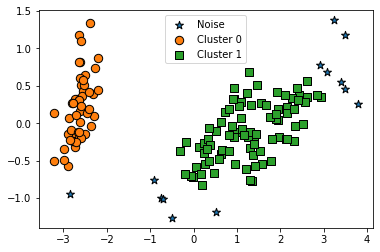

In [28]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


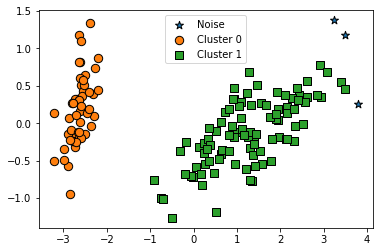

In [29]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


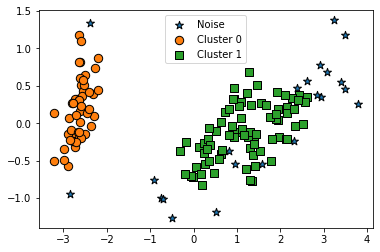

In [30]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

### 실습(6) - DBSCAN + make_circle data

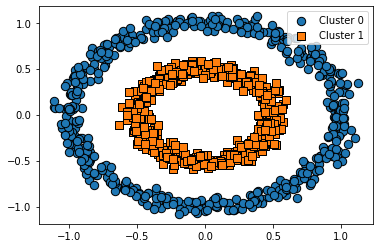

In [31]:
# convex하지 않은 동심원 데이터 생성
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

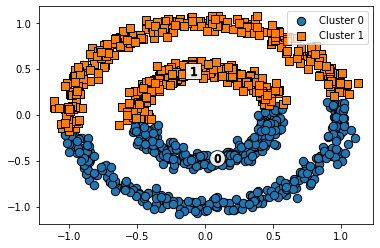

In [32]:
# KMeans로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

# 7. 평균 이동 Clustering
### 실습(7) - 평균 이동 군집화

In [38]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.7, random_state=0)

meanshift= MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [39]:
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [40]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


In [42]:
import pandas as pd


clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X, quantile=0.2)

meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


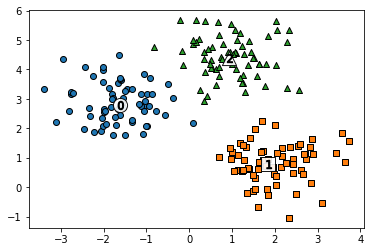

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 marker로 scatter plot 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                edgecolor='k', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)
    
plt.show()

# 부록

### 1. K-Means 구현

* 데이터 만들기

In [79]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from matplotlib import colors

# 데이터를 직접 만드는 부분
# 데이터 분포가 랜덤으로 형성될텐데 3개 그룹이 어느 정도 돌린 후 알고리즘을 구현하는 부분을 작성하면 됨

# np.random.rand: uniform random generation ~ U(0, 1)
# np.random.randn: normal random generation ~ N(0, 1)
r1 = 10*(np.random.rand(2,2) - 0.5)
r2 = 10*(np.random.rand(2,2) - 0.5)
r3 = 10*(np.random.rand(2,2) - 0.5)

t1 = 50*(np.random.rand(2,1) - 0.5)
t2 = 50*(np.random.rand(2,1) - 0.5)
t3 = 50*(np.random.rand(2,1) - 0.5)

x1 = np.random.randn(2, 1000)
x1 = r1.dot(x1) + t1 # dot: 행렬곱

x2 = np.random.randn(2, 5000)
x2 = r2.dot(x2) + t2

x3 = np.random.randn(2, 5000)
x3 = r3.dot(x3) + t3

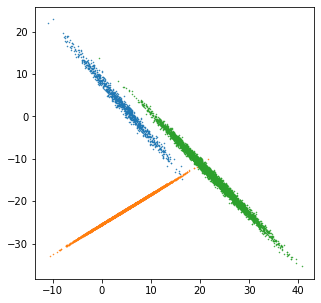

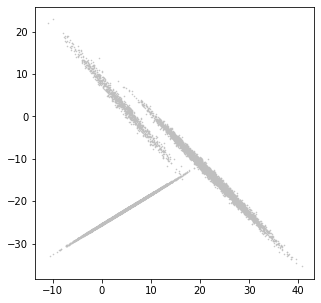

In [80]:
plt.figure(figsize=(5,5))
plt.plot(x1[0,:], x1[1,:], "C0.", markersize=1)
plt.plot(x2[0,:], x2[1,:], "C1.", markersize=1)
plt.plot(x3[0,:], x3[1,:], "C2.", markersize=1)

# unlabeled data
x = np.hstack((x1, x2, x3))

plt.figure(figsize=(5,5))
plt.plot(x[0,:], x[1,:], ".", markersize=1, color=[0.75, 0.75, 0.75])

* K-Means 구현하기

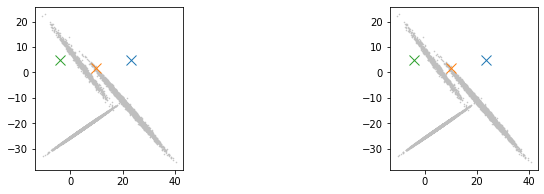

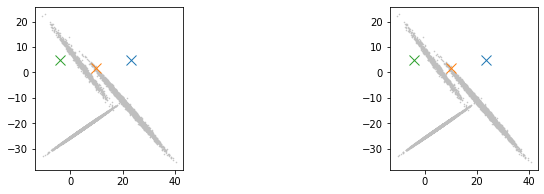

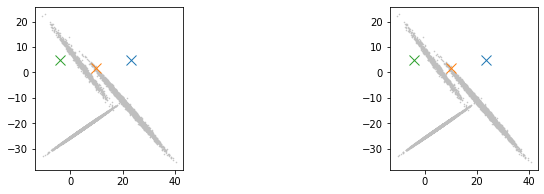

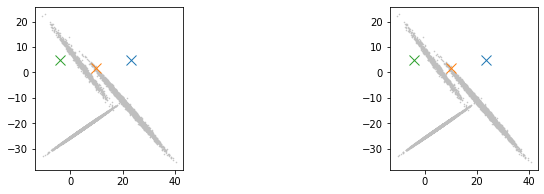

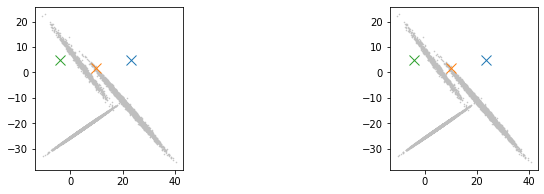

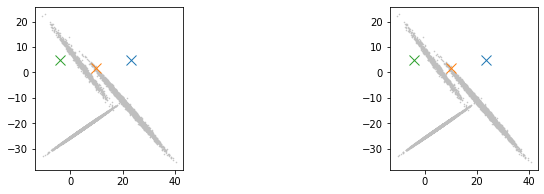

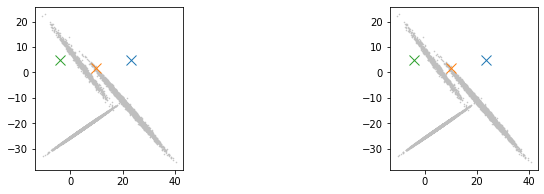

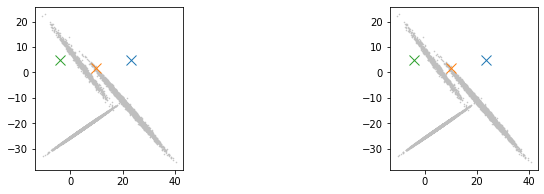

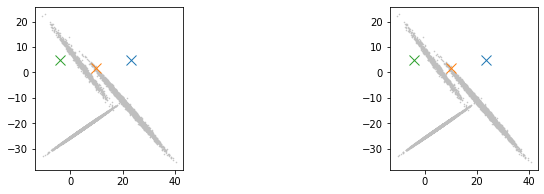

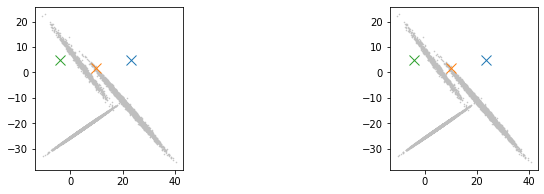

In [87]:
D=2; K=3; N=2000

# mu를 랜덤으로 초기화, 각 열 = 각 cluster의 중심
mu = 50*(np.random.rand(D, K) - 0.5)

# n번째 sample부터 k번째 cluster의 중심까지의 거리**2
d2 = np.zeros((N, K))

for iter in range(0, 10):
    
    for k in range(0, K):
        for n in range(0, N):
            # 어차피 대강 거리만 볼 것이니 굳이 루트까지는 생략
            d2[n, k] = np.sum((x[:, n] - mu[:, k])**2)
    
#     # 위 for문과 동치
#     for k in range(0, K):
#         d2[:, k] = np.sum((x-np.matlib.repmat(mu[:,k].reshape(2,1),1,N))**2, axis=0)

    # 어느 cluster까지 제일 가까운지를 c에 저장
    c = np.argmin(d2, axis=1) # d = (N X K),
    
    plt.figure(figsize=(9, 3))
    plt.subplot(1, 3, 1)
    plt.plot(x[0,:], x[1,:], ".", markersize=1, color=[0.75, 0.75, 0.75])
    plt.plot(mu[0,0], mu[1,0], "C0x", markersize=10)
    plt.plot(mu[0,1], mu[1,1], "C1x", markersize=10)
    plt.plot(mu[0,2], mu[1,2], "C2x", markersize=10)
    
#     # 오류 -> boolean indexing 문제?
#     plt.subplot(1, 3, 2)
#     plt.plot(x[0,c==0], x[1,c==0], "C0.", markersize=1)
#     plt.plot(x[0,c==1], x[1,c==1], "C1.", markersize=1)
#     plt.plot(x[0,c==2], x[1,c==2], "C2.", markersize=1)
    
    plt.subplot(1, 3, 3)
    plt.plot(x[0,:], x[1,:], ".", markersize=1, color=[0.75, 0.75, 0.75])
    plt.plot(mu[0,0], mu[1,0], "C0x", markersize=10)
    plt.plot(mu[0,1], mu[1,1], "C1x", markersize=10)
    plt.plot(mu[0,2], mu[1,2], "C2x", markersize=10)
    
#     # 각 cluster에 대해 mu 업데이트
#     for k in range(0, K):
#         mu[:,k] = np.mean(x[:, c==k], axis=1)
        
#     plt.plot(mu[0,0], mu[1,0], "C0+", markersize=10)
#     plt.plot(mu[0,1], mu[1,1], "C1+", markersize=10)
#     plt.plot(mu[0,2], mu[1,2], "C2+", markersize=10)

### 2. K-Means++
* K-평균++ 알고리즘: 초기 중심위치를 설정하기 위한 알고리즘으로 되도록 멀리 떨어진 중심위치 집합을 찾아냄

### 3. make_classification()

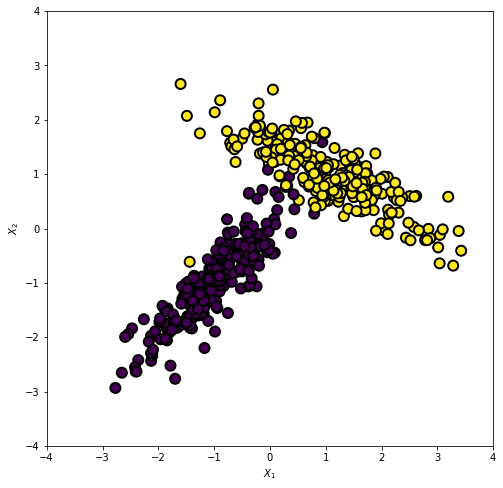

In [90]:
from sklearn.datasets import make_classification

plt.figure(figsize=(8, 8))
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=6)
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=100, edgecolor='k', linewidth=2)

plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()